### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа: НФИбд-01-21

## Москва 2024
***

### Вариант № 16



1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).

In [11]:
# задаем данные из репозитария UCI
url = "winequality-red.csv"

С помощью библиотеки Pandas считаем набор данных "Wine quality"

In [13]:
import pandas as pd
# считываем данные в объект DataFrame
data = pd.read_csv(url, sep=';', header=None )
data = data.iloc[1:]
data


,0,1,2,3,4,5,6,7,8,9,10,11
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [4]:
data.describe()

NameError: name 'data' is not defined

2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

В данном репозитарии отсутствуют столбцы с датами, поэтому нет необходимости проводить удаление 

In [61]:
import numpy as np

count = data.applymap(lambda x: x.count('?')).sum() # проверим есть ли "?" в репозитарии
print(count)

# В случае нахождение "?" делали бы следующее:
# data = data.replace('?', np.NaN) если в таблице присутствуют значение "?", то заменим на NaN

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1600 non-null   object
 1   1       1600 non-null   object
 2   2       1600 non-null   object
 3   3       1600 non-null   object
 4   4       1600 non-null   object
 5   5       1600 non-null   object
 6   6       1600 non-null   object
 7   7       1600 non-null   object
 8   8       1600 non-null   object
 9   9       1600 non-null   object
 10  10      1600 non-null   object
 11  11      1600 non-null   object
dtypes: object(12)
memory usage: 150.1+ KB


In [63]:
# Поскольку нет "?", то пропущенных значений NaN нет, но в обратном случае сделали бы следующее, чтобы узнать число пропущенных значений:
# for c in data.columns:
#     print('\t%s: %d' % (c,data[c].isna().sum()))
# после заполним пропуски медианным значением
# data = data.fillna(data.median(numeric_only=True))
# for c in data.columns:
#     print('\t%s: %d' % (c,data[c].isna().sum()))
# и приведем данные к типу float data = data.astype(float)

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

In [64]:
data[11].value_counts(sort=False)
# столбец 11 содержит метку класса, поскольку принимает лишь значения (Quality) 7, 6, 4, 5, 8, 3

quality      1
5          681
6          638
7          199
4           53
8           18
3           10
Name: 11, dtype: int64

Сделаем похожее действие, проверим уникальность значений уже визуально с помощью дискретизации

In [65]:
import matplotlib.pyplot as plt

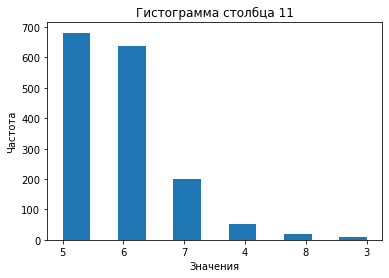

In [79]:
c_name = 11
plt.hist(data.iloc[1:,c_name], bins=11) # допустим данные разделяться на 11 значений, проверим требуеться ли дискретизация
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма столбца 11')
plt.show()